Hello this kernel is a work in process.I will be doing an exploratory data analysis and Crime forecasting in this data set.I will be updating this kernel in coming days.If you like my work please do vote.

In [62]:
#!conda install -c conda-forge fbprophet -y
#!pip install folium
#!pip install pystan
#!pip install seaborn

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./app.py
./archive.zip
./boston-crime-analysis.ipynb
./boston-crime-prediction.ipynb
./boston-crime-prediction_2016.ipynb
./crime.csv
./entrenamiento_final.csv
./model.pkl
./model.py
./offense_codes.csv
./Police_Districts.geojson
./README.md
./request.py
./.git\COMMIT_EDITMSG
./.git\config
./.git\description
./.git\HEAD
./.git\index
./.git\hooks\applypatch-msg.sample
./.git\hooks\commit-msg.sample
./.git\hooks\fsmonitor-watchman.sample
./.git\hooks\post-update.sample
./.git\hooks\pre-applypatch.sample
./.git\hooks\pre-commit.sample
./.git\hooks\pre-merge-commit.sample
./.git\hooks\pre-push.sample
./.git\hooks\pre-rebase.sample
./.git\hooks\pre-receive.sample
./.git\hooks\prepare-commit-msg.sample
./.git\hooks\update.sample
./.git\info\exclude
./.git\logs\HEAD
./.git\logs\refs\heads\master
./.git\logs\refs\remotes\origin\master
./.git\objects\0e\9af3c32fb9272d91b7c43e13782701772f9df3
./.git\objects\15\39bd526cb47d86cee9fe73574108d257435f13
./.git\objects\18\40f1554bad6e8c019fb5e9943ab72

#### Importing Python Modules 

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
from fbprophet import Prophet

In [205]:
data=pd.read_csv('./crime.csv',encoding='ISO-8859-1')

In [206]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,2/09/2018 13:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,21/08/2018 00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,3/09/2018 19:27,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,3/09/2018 21:16,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,3/09/2018 21:05,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [207]:
data.shape

(296511, 14)

#### Renaiming the columns for convinence

In [208]:
data1 = data.rename(columns={'OFFENSE_CODE':'Code','OFFENSE_CODE_GROUP':'Group','OFFENSE_DESCRIPTION':'Description','OCCURRED_ON_DATE':'Date'})
data1.head()

,INCIDENT_NUMBER,Code,Group,Description,DISTRICT,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,2/09/2018 13:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,21/08/2018 00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,3/09/2018 19:27,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,3/09/2018 21:16,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,3/09/2018 21:05,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


#### Finding the missing data 

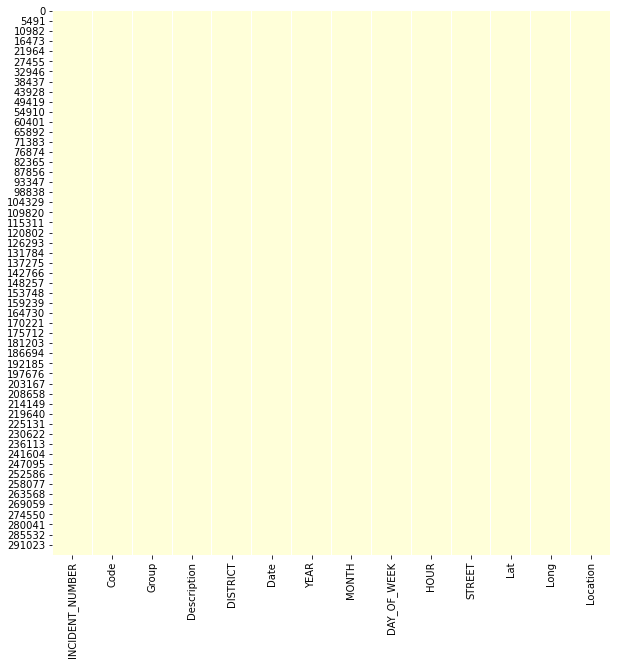

In [209]:
#!pip install seaborn
#!pip install --upgrade seaborn
plt.figure(figsize=(10,10))
sns.heatmap(data1.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

All the horizontal lines show the missing data in the dataset.Let us clean up the missing data by dropping the columns with missing data.Also the columns getting dropped will not have an affect on the forecasting of the crime.

#### Dropping the unwanted columns

In [210]:
data1.drop(['INCIDENT_NUMBER','Code','Lat','Long','Location'],inplace=True,axis=1)
data1.head()

,Group,Description,DISTRICT,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,LARCENY ALL OTHERS,D14,2/09/2018 13:00,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,VANDALISM,C11,21/08/2018 00:00,2018,8,Tuesday,0,HECLA ST
2,Towed,TOWED MOTOR VEHICLE,D4,3/09/2018 19:27,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,INVESTIGATE PROPERTY,D4,3/09/2018 21:16,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,INVESTIGATE PROPERTY,B3,3/09/2018 21:05,2018,9,Monday,21,DELHI ST


#### Arranging the date in datetime format

In [212]:
data1['Date']=pd.to_datetime(data1['Date'], dayfirst=True)
data1.head()

,Group,Description,DISTRICT,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,LARCENY ALL OTHERS,D14,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,VANDALISM,C11,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST
2,Towed,TOWED MOTOR VEHICLE,D4,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,INVESTIGATE PROPERTY,D4,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,INVESTIGATE PROPERTY,B3,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST


In [213]:
data1.Date

0        2018-09-02 13:00:00
1        2018-08-21 00:00:00
2        2018-09-03 19:27:00
3        2018-09-03 21:16:00
4        2018-09-03 21:05:00
                 ...        
296506   2016-06-05 17:25:00
296507   2015-07-09 13:38:00
296508   2015-07-09 13:38:00
296509   2016-05-31 19:35:00
296510   2015-06-22 00:12:00
Name: Date, Length: 296511, dtype: datetime64[ns]

In [214]:
data1.index=pd.DatetimeIndex(data1.Date)
data1.head()

,Group,Description,DISTRICT,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
Date,,,,,,,,,
2018-09-02 13:00:00,Larceny,LARCENY ALL OTHERS,D14,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST
2018-08-21 00:00:00,Vandalism,VANDALISM,C11,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST
2018-09-03 19:27:00,Towed,TOWED MOTOR VEHICLE,D4,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST
2018-09-03 21:16:00,Investigate Property,INVESTIGATE PROPERTY,D4,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST
2018-09-03 21:05:00,Investigate Property,INVESTIGATE PROPERTY,B3,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST


#### Getting information most recurring Crime

In [215]:
data1['Group'].value_counts()

Motor Vehicle Accident Response              30376
Larceny                                      25057
Medical Assistance                           22361
Investigate Person                           17964
Other                                        17019
                                             ...  
Manslaughter                                     6
INVESTIGATE PERSON                               4
Biological Threat                                2
Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: Group, Length: 67, dtype: int64

In [216]:
data1['Group'].value_counts().iloc[:15]

Motor Vehicle Accident Response    30376
Larceny                            25057
Medical Assistance                 22361
Investigate Person                 17964
Other                              17019
Vandalism                          14838
Simple Assault                     14837
Drug Violation                     14387
Verbal Disputes                    12942
Towed                              10736
Investigate Property               10584
Larceny From Motor Vehicle         10235
Property Lost                       9309
Warrant Arrests                     7519
Aggravated Assault                  7215
Name: Group, dtype: int64

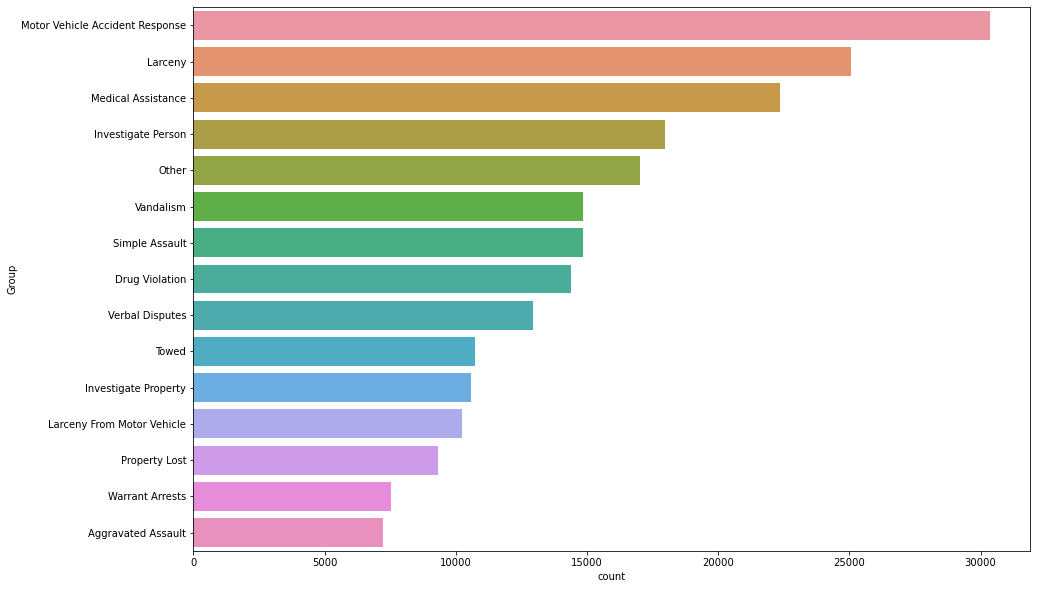

In [217]:
order_data=data1['Group'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Group',data=data1,order=order_data)
plt.ioff()

So we can clearly see that the motor vehicle accident,theft and medical assistance are most crime indidents reported in Boston.

#### Resampling the data: 
This is done to segregate the crime count based on time period like month,quarter and year

In [218]:
data1.resample('Y').size()

Date
2015-12-31    51154
2016-12-31    91533
2017-12-31    93093
2018-12-31    60731
Freq: A-DEC, dtype: int64

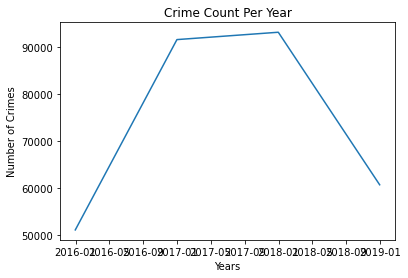

In [219]:
plt.plot(data1.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.ioff()

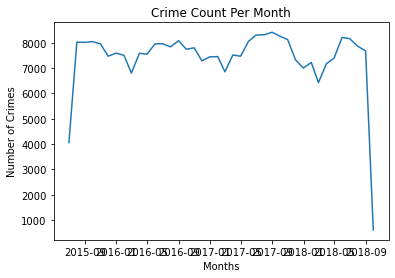

In [220]:
plt.plot(data1.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.ioff()

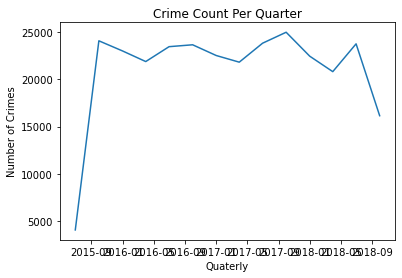

In [221]:
plt.plot(data1.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quaterly')
plt.ylabel('Number of Crimes')
plt.ioff()

The X axis values and not getting displayed correctly.I am not sure why ? May be someone can throw some light on what needs to be done

#### Preparing the data 

In [222]:
Boston_prophet=data1.resample('M').size().reset_index()

In [223]:
Boston_prophet.head()

,Date,0
0,2015-06-30,4059
1,2015-07-31,8023
2,2015-08-31,8015
3,2015-09-30,8044
4,2015-10-31,7957


#### Renaming the columns of Boston_prophet

In [224]:
Boston_prophet.columns=['Date','Crime_Count']

In [225]:
Boston_prophet.head()

,Date,Crime_Count
0,2015-06-30,4059
1,2015-07-31,8023
2,2015-08-31,8015
3,2015-09-30,8044
4,2015-10-31,7957


In [226]:
Boston_prophet_final=Boston_prophet.rename(columns={'Date':'ds','Crime_Count':'y'})

In [227]:
Boston_prophet_final.head()

,ds,y
0,2015-06-30,4059
1,2015-07-31,8023
2,2015-08-31,8015
3,2015-09-30,8044
4,2015-10-31,7957


#### Make Predictions

In [302]:
#!pip install --upgrade holidays pystan
#!pip install pystan==2.19.1.1 prophet
#!pip install prophet
#!conda install -c conda-forge prophet -y
#from prophet import Prophet
from fbprophet.diagnostics import cross_validation
#m=Prophet(growth='linear', weekly_seasonality=True)
#m=Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True)
m=Prophet()
#m=Prophet()
m.fit(Boston_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [306]:
#future=m.make_future_dataframe(freq='W', periods=20)
future=m.make_future_dataframe(periods=365)

forecast=m.predict(future)
#cv_results = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel="dask")

In [307]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-06-30,8019.528325,4567.894356,7192.805151,8019.528325,8019.528325,-2041.841841,-2041.841841,-2041.841841,-2041.841841,-2041.841841,-2041.841841,0.0,0.0,0.0,5977.686484
1,2015-07-31,8000.662075,7402.209320,10069.898878,8000.662075,8000.662075,740.141419,740.141419,740.141419,740.141419,740.141419,740.141419,0.0,0.0,0.0,8740.803494
2,2015-08-31,7981.795825,7204.991167,9944.582110,7981.795825,7981.795825,698.791706,698.791706,698.791706,698.791706,698.791706,698.791706,0.0,0.0,0.0,8680.587530
3,2015-09-30,7963.538163,4523.254106,7288.952243,7963.538163,7963.538163,-2037.648948,-2037.648948,-2037.648948,-2037.648948,-2037.648948,-2037.648948,0.0,0.0,0.0,5925.889215
4,2015-10-31,7944.671913,7238.282082,10024.497202,7944.671913,7944.671913,626.966371,626.966371,626.966371,626.966371,626.966371,626.966371,0.0,0.0,0.0,8571.638285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2019-09-26,7076.771954,-1692.248679,1021.651730,7076.769400,7076.774682,-7492.925867,-7492.925867,-7492.925867,-7492.925867,-7492.925867,-7492.925867,0.0,0.0,0.0,-416.153914
401,2019-09-27,7076.163303,-518.918525,2213.133052,7076.160743,7076.166042,-6265.889064,-6265.889064,-6265.889064,-6265.889064,-6265.889064,-6265.889064,0.0,0.0,0.0,810.274239
402,2019-09-28,7075.554651,765.942162,3408.776917,7075.552082,7075.557405,-4936.768985,-4936.768985,-4936.768985,-4936.768985,-4936.768985,-4936.768985,0.0,0.0,0.0,2138.785666
403,2019-09-29,7074.946000,2221.149317,4857.798344,7074.943419,7074.948766,-3521.454746,-3521.454746,-3521.454746,-3521.454746,-3521.454746,-3521.454746,0.0,0.0,0.0,3553.491254


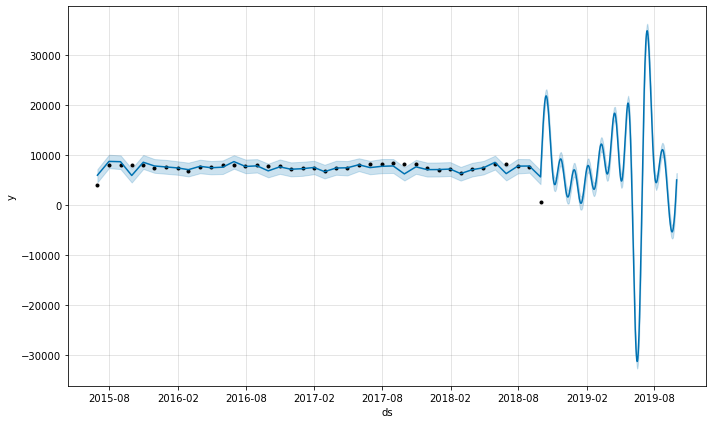

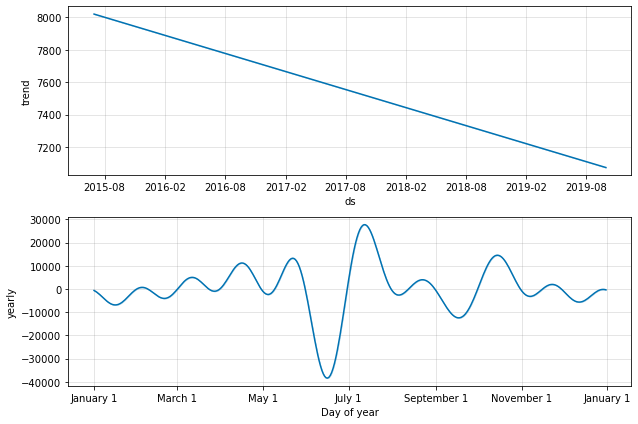

In [308]:
plot1 = m.plot(forecast)
plot2 = m.plot_components(forecast)